# Data Analytics Onboarding Tool

Diesem Python-Notebook wurde entwickelt um

- eine weitgehend automatische deskriptive Analyse von Datensätzen zu ermöglichen
- die Potentiale von code-basierter Analyse zu zeigen
- einen Ausblick auf die Möglichkeiten von Machine-Learning zu geben

Beispielhaft wird hier der Gemeindedatensatz aus der DDJ-Lehrveranstaltung der FH Joanneum Graz verwendet.

**Hinweise:**
* Das Tools selbst ist interaktiv und somit ist es Möglich den Programmiercode an jeder Stelle zu verändern und an persönliche Bedürfnisse anzupassen. Das originale Notebook wird dabei nicht überschrieben. Änderungen sind daher unbedenklich - das Original kann jederzeit wiederhergestellt werden.
* Die # dient zum Auskommentieren. Solche Zeilen können entweder Erklärungen sein, oder dazu dienen Optionen im Code auszuprobieren (indem eine Zeile auskommentiert und eine andere aktiviert wird).

## Datenimport

Im ersten Schritt werden die notwendigen Libraries, sowie der Datensatz selbst geladen.

* **Pandas** ist eine sehr mächtige Library die speziell für Datenanalyse entwickelt wurde.
* **Seaborn** ist eine Library für die statistische Datenvisualisierung.

**import pandas as pd** importiert die gesamte Pandas-Library und stellt sie unter dem Kürzel *pd* zur Verfügung. Somit können im Folgenden befehle aus der Library mit *pd.[BEFEHL]* abgerufen werden. Wie etwa der Befehl *read_csv* der den Datenimport aus CSV-Dateien erledigt.

In [6]:
# Import kompletter Libraries
import pandas as pd
import seaborn as sns

# Import einer einzigen Funktion aus einer Library
from pandas_profiling import ProfileReport

# Import des Gemeindedatensatzes mit Pandas 
# die Option sep=";" gibt das Trennzeichen für die Spalten an (separator)
gemeindedaten = pd.read_csv('alle_gemeinden.csv', sep=';')

# Ausgabe der ersten Zeilen zur Kontrolle
gemeindedaten.head()

Name  Einwohner  Arbeitsstätten  Beschäftigte  Alter  Einkommen  \
0         Gramais         41               7            12  48,74     37.624   
1          Namlos         65               9            16   47,7     40.166   
2   Tschanigraben         67               1             1  51,34     35.946   
3         Kaisers         78              14            20  44,35     42.825   
4  Hinterhornbach         94              12            20  44,53     33.719   

   Erbwerbstätige (15-64) Grundstückspreise  Anzahl an Ehepaaren  \
0                      19              68,4                   11   
1                      42              63,6                   16   
2                      26              11,9                   13   
3                      37              68,4                   12   
4                      46              68,4                   19   

  Anzahl der Kinder  
0               1,5  
1               1,5  
2              1,78  
3                 2  
4              1,62

Was hier auffällt ist, dass im CSV-File Spalten sind in denen ein "," als Dezimaltrennzeichen verwendet wird, und solche in denen ein "." verwendet wird. Dieses Problem ist ein extrem gängiges Problem, welches auch bei der Verwendung von Excel (oder anderen Tabellenkalkulationsprogrammen) berücksichtig werden muss.

Durch die unterschiedlichen Dezimaltennzeichen sind die Daten nicht vernünftig verarbeitbar, da sie falsch eingelesen werden: Der folgende Befehl zeigt uns, als was für Daten die einzelnen Spalten erkannt wurden.

In [23]:
print(gemeindedaten.dtypes)

Name                       object
Einwohner                   int64
Arbeitsstätten              int64
Beschäftigte                int64
Alter                     float64
Einkommen                 float64
Erbwerbstätige (15-64)      int64
Grundstückspreise         float64
Anzahl an Ehepaaren         int64
Anzahl der Kinder         float64
dtype: object


Wie man sieht, sind die Spalten "Name", "Alter", "Grundstückspreise" und "Anzahl der Kinder" als *object* kodiert - also keine Zahlen (float oder integer).

Um dieses Problem zu lösen werden wir die Dezimaltrennzeichen im CSV-File vereinheitlichen (auf "."). Dazu gehen wir wie folgt vor:

1. Einlesen des CSV
2. Umwandeln aller "," die eventuell als Text vorhanden sind durch eine sehr unwahrscheinliche Zeichenkombination (##@#!)
3. Ersetzen aller vorhandener "," durch "."
4. Rückumwandlung der Beistriche

In [24]:
# Öffnen des CSV-Files mit den Daten
with open("alle_gemeinden.csv") as datei:
    content = datei.read()

# Vereinheitlichen der Dezimaltrennzeichen
content = content.replace('","','##@#!')    #Um notwendige Beistriche nicht zu löschen
content = content.replace(',','.')
content = content.replace('##@#!','","')

# Speichern des (neuen) CSV-Files
with open("gemeinden.csv", "w") as datei:
    content = datei.write(content)

# Import des CSV-Files mit Pandas
gemeindedaten = pd.read_csv('gemeinden.csv', sep=';', na_values=["-"])

# Kontrolle anhand der ersten Zeilen
gemeindedaten.head()

Name  Einwohner  Arbeitsstätten  Beschäftigte  Alter  Einkommen  \
0         Gramais         41               7            12  48.74     37.624   
1          Namlos         65               9            16  47.70     40.166   
2   Tschanigraben         67               1             1  51.34     35.946   
3         Kaisers         78              14            20  44.35     42.825   
4  Hinterhornbach         94              12            20  44.53     33.719   

   Erbwerbstätige (15-64)  Grundstückspreise  Anzahl an Ehepaaren  \
0                      19               68.4                   11   
1                      42               63.6                   16   
2                      26               11.9                   13   
3                      37               68.4                   12   
4                      46               68.4                   19   

   Anzahl der Kinder  
0               1.50  
1               1.50  
2               1.78  
3               2.00  
4               1.62

Nun sind alle Spalten korrekt kodiert, was man sich mit *gemeindedaten.dtypes* auch noch ansehen kann (Kommentar vor dem Befehl entfernen).

Bleibt noch zu klären, ob alle Daten eingelesen wurden. Mithilfe von *shape* wird die Dimension des Datensatzes ausgegeben.

In [25]:
# Wiederholte Kontrolle des Datensatzes

#gemeindedaten.dtypes

In [26]:
# Überprüfe ob Datensatz vollständig ist
# Ausgabe im Format (Anzahl Zeilen, Anzahl Spalten)

gemeindedaten.shape

(2117, 10)

## Deskriptive Analyse

Der Datensatz soll nun einer ersten Analyse unterzogen werden. Dabei stellt sich die Frage nach der Aussagekraft bei der Gegenüberstellung der einzelnen Gemeinden. Nachdem eine Großstadt mehr Einwohner hat, ist es auch naheliegend, dass sie mehr Ehepaare haben wird als ein kleines Bergdorf. Um die Gemeinden miteinander vergleichen zu können macht es daher für *Anzahl an Ehepaaren* Sinn die Variable in Relation zur Einwohnerzahl zu setzen.

Das selbe trifft auch auf *Arbeitsstätten*, *Beschäftigte* und *Erbwerbstätige (15-64)* zu. Diese Spalten werden im Folgenden normiert.

In [107]:
# Erstelle eine Kopie des Datensatzes
# (sicher ist sicher - so kann immer auf das Original zugegriffen werden ;)
daten_normiert = gemeindedaten.copy()

# Division der 4 Spalten/Variablen durch die Einwohneranzahl
daten_normiert["Arbeitsstätten"] = daten_normiert["Arbeitsstätten"]/daten_normiert["Einwohner"]
daten_normiert["Beschäftigte"] = daten_normiert["Beschäftigte"]/daten_normiert["Einwohner"]
daten_normiert["Erbwerbstätige (15-64)"] = daten_normiert["Erbwerbstätige (15-64)"]/daten_normiert["Einwohner"]
daten_normiert["Anzahl an Ehepaaren"] = daten_normiert["Anzahl an Ehepaaren"]/daten_normiert["Einwohner"]

# Ausgabe zur Kontrolle
daten_normiert.head()

Name  Einwohner  Arbeitsstätten  Beschäftigte  Alter  Einkommen  \
0         Gramais         41        0.170732      0.292683  48.74     37.624   
1          Namlos         65        0.138462      0.246154  47.70     40.166   
2   Tschanigraben         67        0.014925      0.014925  51.34     35.946   
3         Kaisers         78        0.179487      0.256410  44.35     42.825   
4  Hinterhornbach         94        0.127660      0.212766  44.53     33.719   

   Erbwerbstätige (15-64)  Grundstückspreise  Anzahl an Ehepaaren  \
0                0.463415               68.4             0.268293   
1                0.646154               63.6             0.246154   
2                0.388060               11.9             0.194030   
3                0.474359               68.4             0.153846   
4                0.489362               68.4             0.202128   

   Anzahl der Kinder  
0               1.50  
1               1.50  
2               1.78  
3               2.00  
4               1.62

Nun können wir die den Datensatz mit 

In [ ]:
#profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

#Interessante Warnung beim normierten Datensatz: "Highly skewed"
profile = ProfileReport(daten_normiert, title='Pandas Profiling Report', explorative=True)
#profile.to_file("pandas_report.html")
profile.to_notebook_iframe()

#PROBLEM: ValueError: Produced output is too large and cannot be displayed. Consider saving it to a file.
# Wie kann man das vermeiden? Kennzahl löschen/ignorieren?

In [ ]:
display(HTML("<p style='font-size:15px'> <a href='' target='_blank'>Statistische Grundlagen</a> </p>"))

# Weiter Sachen


In [49]:
# Gemeindeliste aus Statistik.at 
# Habe ersten 2 Zeilen (und die letzte Zeile) aus dem Datensatz löschen müssen weil es Text war... 
# gibt es eine bessere Methode als manuell löschen?
dataset2 = pd.read_csv('gemliste_knz_edited.csv', sep=';')

dataset2.head()

Gemeindekennziffer                    Gemeindename  Gemeindecode Status  \
0               10101                      Eisenstadt         10101     SR   
1               10201                            Rust         10201     SR   
2               10301  Breitenbrunn am Neusiedler See         10301      M   
3               10302                  Donnerskirchen         10302      M   
4               10303                     Großhöflein         10303      M   

   PLZ des Gem.Amtes weitere Postleitzahlen  
0               7000                    NaN  
1               7071                    NaN  
2               7091                    NaN  
3               7082                    NaN  
4               7051                    NaN

In [28]:
dataset2.shape

(2117, 6)

In [65]:
dataset3 = dataset2.join(dataset.set_index('Name'), on='Gemeindename')

dataset3.head()
dataset3.Gemeindename.value_counts()

#PROBLEM: WIEN Namen sind anders
# provisorische Lösung: ich bearbeite die Gemeindenamen im csv ... geht es auch anders?
# habe dafür edited file benutzt
# original ist auch da (gemliste_knz)

Warth                            4
Mühldorf                         4
Krumbach                         4
Wimpassing an der Leitha         1
Aurach am Hongar                 1
                                ..
Sankt Gallen                     1
Kaltenberg                       1
Sankt Martin am Tennengebirge    1
Waldneukirchen                   1
Geiersberg                       1
Name: Gemeindename, Length: 2114, dtype: int64

In [106]:
#dataset3.iloc[["name"]=="Warth"]
#dataset.loc[dataset["Name"] == "Warth"]
#dataset2.loc[dataset2["Gemeindename"] == "Warth"]
#dataset2[dataset2.Gemeindename.isin(["Warth", "Mühldorf", "Krumbach"])]

doppelte = dataset2.Gemeindename.isin(["Warth", "Mühldorf", "Krumbach"])

for i in doppelte:
    print(type(i))
    #dataset2.loc[i].Gemeindename = dataset2.loc[i].Gemeindename+"1"


# Gemeindekennziffern Warth: 31843 & 80239
# Gemeindekennziffern 


ol'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<class 'bool'>
<clas

In [ ]:
dataset3.shape

In [43]:
#df_norm = dataset.copy()
df_norm = dataset3.copy()
df_norm["Arbeitsstätten"] = df_norm["Arbeitsstätten"]/df_norm["Einwohner"]
df_norm["Beschäftigte"] = df_norm["Beschäftigte"]/df_norm["Einwohner"]
df_norm["Erbwerbstätige (15-64)"] = df_norm["Erbwerbstätige (15-64)"]/df_norm["Einwohner"]
df_norm["Anzahl an Ehepaaren"] = df_norm["Anzahl an Ehepaaren"]/df_norm["Einwohner"]

df_norm.head()

Gemeindekennziffer                    Gemeindename  Gemeindecode Status  \
0               10101                      Eisenstadt         10101     SR   
1               10201                            Rust         10201     SR   
2               10301  Breitenbrunn am Neusiedler See         10301      M   
3               10302                  Donnerskirchen         10302      M   
4               10303                     Großhöflein         10303      M   

   PLZ des Gem.Amtes weitere Postleitzahlen  Einwohner  Arbeitsstätten  \
0               7000                    NaN      14895        0.125680   
1               7071                    NaN       2000        0.118500   
2               7091                    NaN       1883        0.101965   
3               7082                    NaN       1841        0.104834   
4               7051                    NaN       2122        0.085297   

   Beschäftigte  Alter  Einkommen  Erbwerbstätige (15-64) Grundstückspreise  \
0      1.244444  43,81     48.398                0.463444             216,4   
1      0.501000  47,07     42.325                0.471000             136,5   
2      0.276155  49,14     50.780                0.464684             192,5   
3      0.234112  46,65     44.289                0.474742             118,6   
4      0.287936  44,11     47.262                0.497172             156,3   

   Anzahl an Ehepaaren Anzahl der Kinder  
0             0.174958              1,56  
1             0.199500              1,51  
2             0.218800              1,53  
3             0.212928              1,49  
4             0.214420              1,55

In [ ]:
features = ["Einwohner", "Arbeitsstätten", "Beschäftigte", "Alter", "Einkommen", "Erbwerbstätige (15-64)", "Grundstückspreise", "Anzahl an Ehepaaren", "Anzahl der Kinder"]
#ft_plot = sns.pairplot(dataset[features])

#ft_plot = sns.pairplot(df_norm)
ft_plot = sns.pairplot(df_norm[features])

In [ ]:
# Zum Ansehen von interessanten Sachen
# spalte="Anzahl an Ehepaaren" ## Warth df_norm.iloc[11] hat 368 Ehepaare bei 171 Einwohnern
# spalte="Beschäftigte" ## Innere Stadt Wien hat 10x so viele Beschäftigte wie Einwohner

spalte="Beschäftigte"

print("ABSOLUT")
print(dataset.loc[dataset[spalte] == dataset[spalte].max()])


print(" ")
print("RELATIV")
df_norm.loc[df_norm[spalte] == df_norm[spalte].max()]

#dataset.iloc[11]
#df_norm.iloc[11]

In [110]:
# pandas profiling
from pandas_profiling import ProfileReport
#profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

#Interessante Warnung beim normierten Datensatz: "Highly skewed"
profile = ProfileReport(daten_normiert, title='Pandas Profiling Report', explorative=True)
#profile.to_file("pandas_report.html")
profile.to_notebook_iframe()

#PROBLEM: ValueError: Produced output is too large and cannot be displayed. Consider saving it to a file.
# Wie kann man das vermeiden? Kennzahl löschen/ignorieren?

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



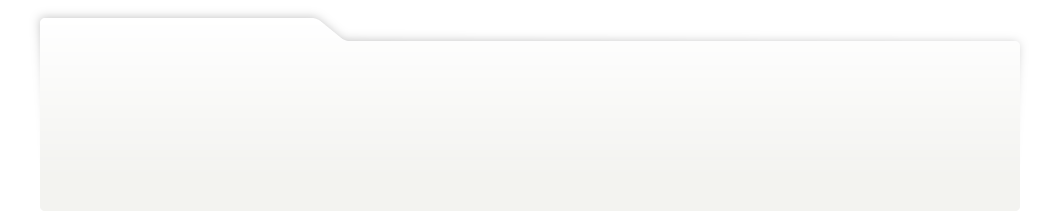
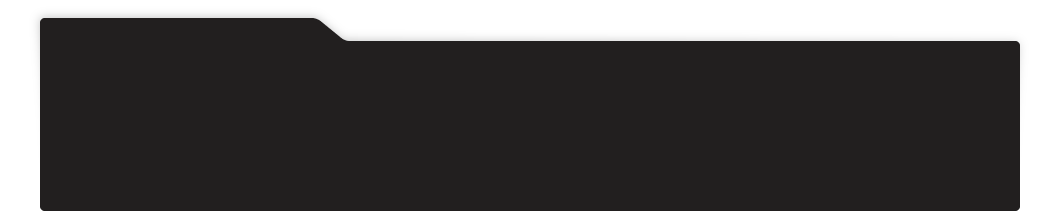
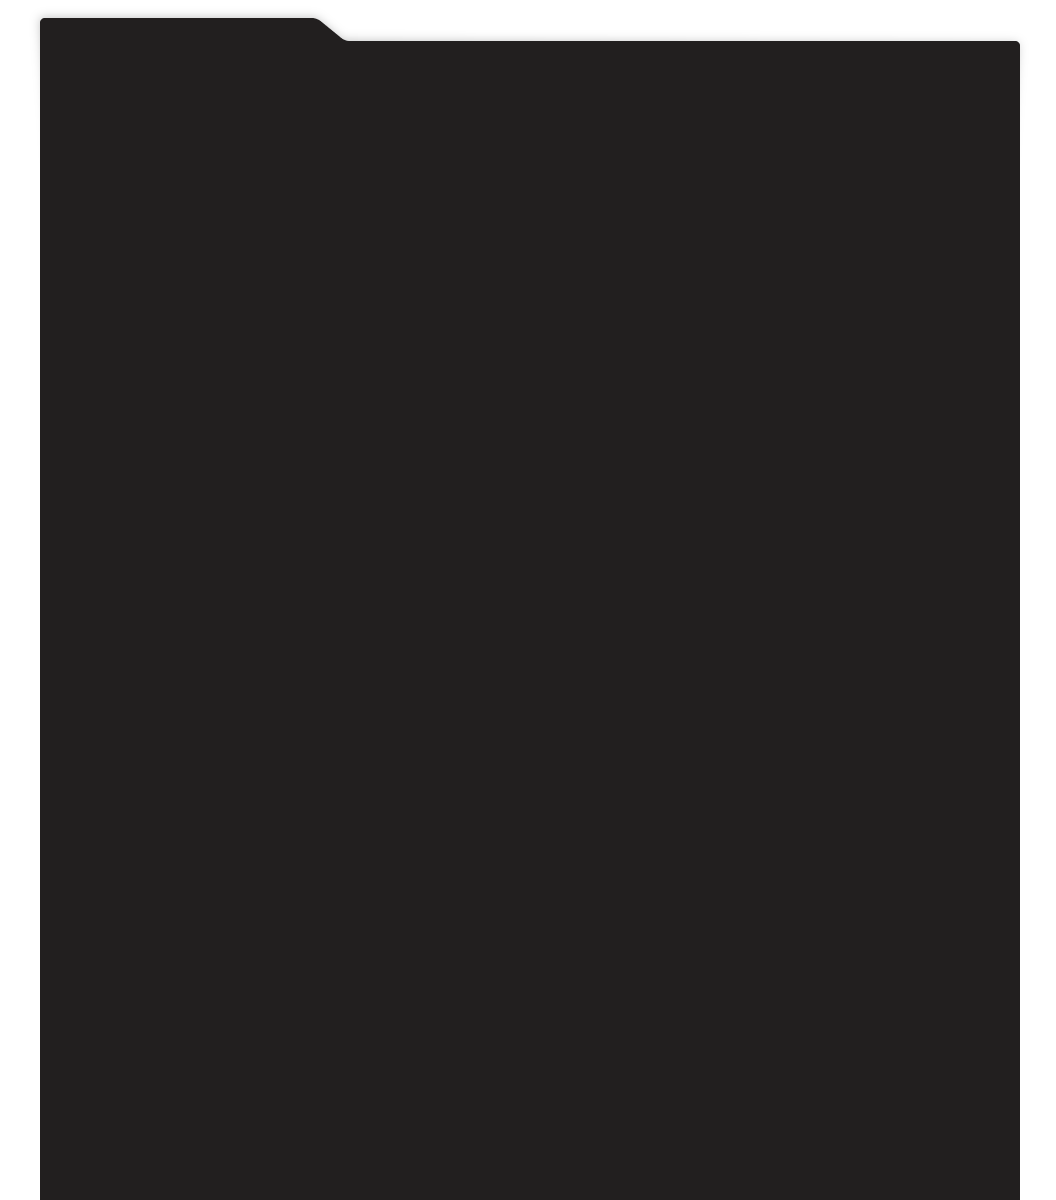
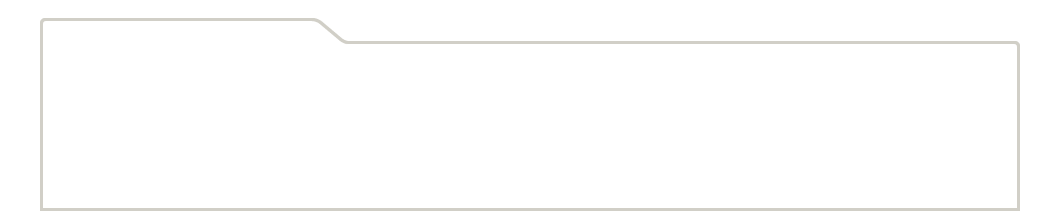
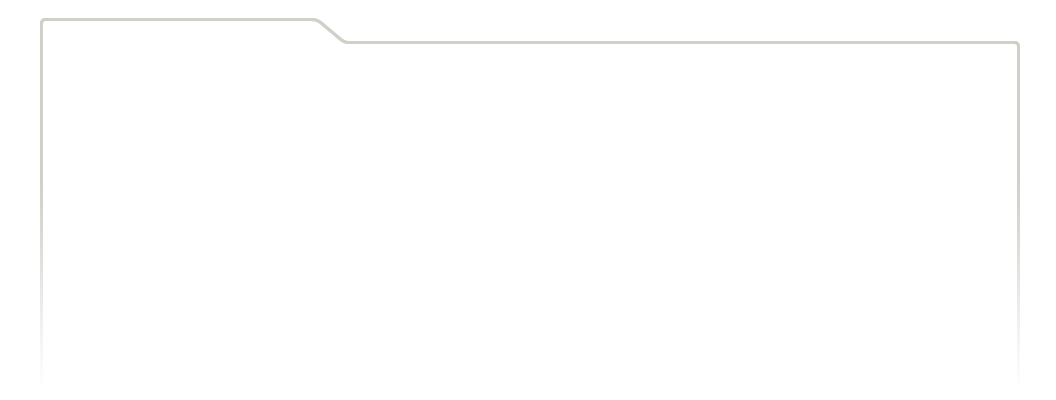
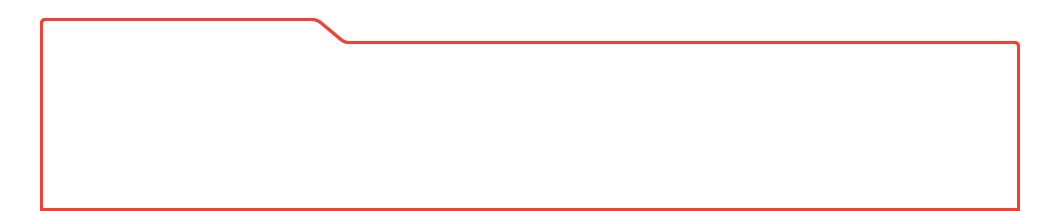
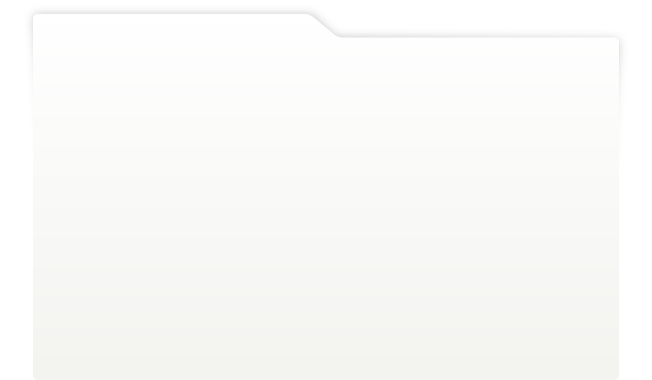
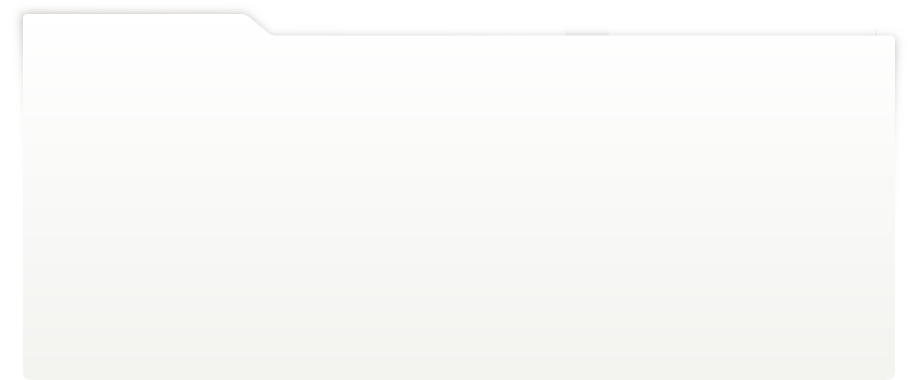
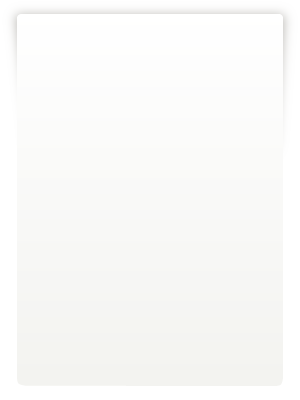
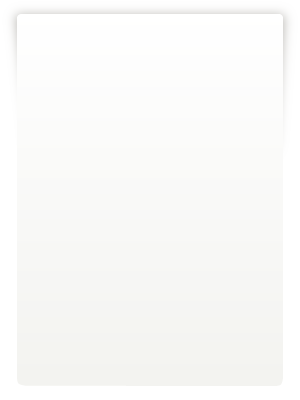
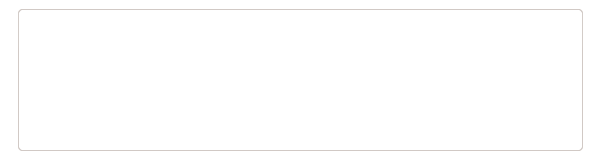
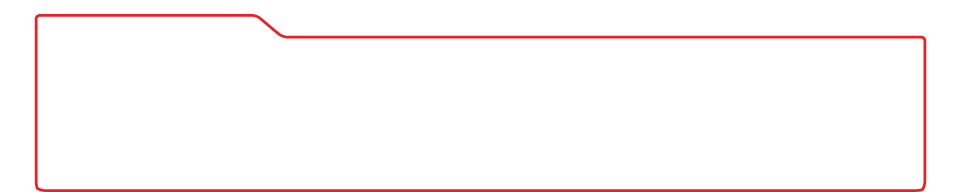
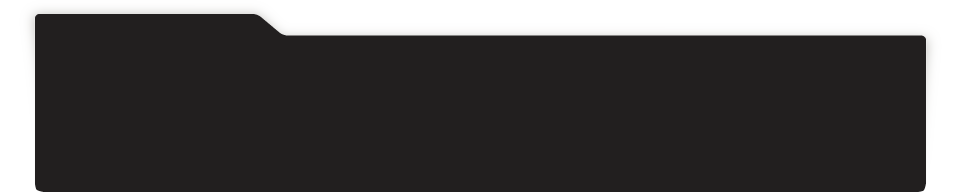
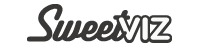
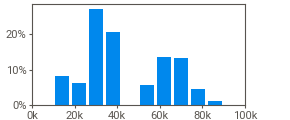
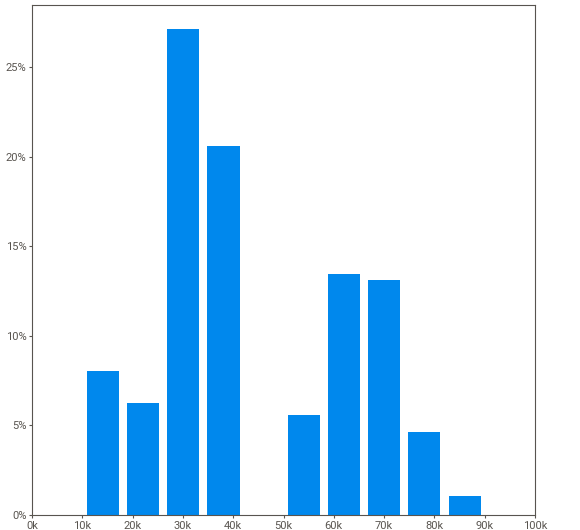
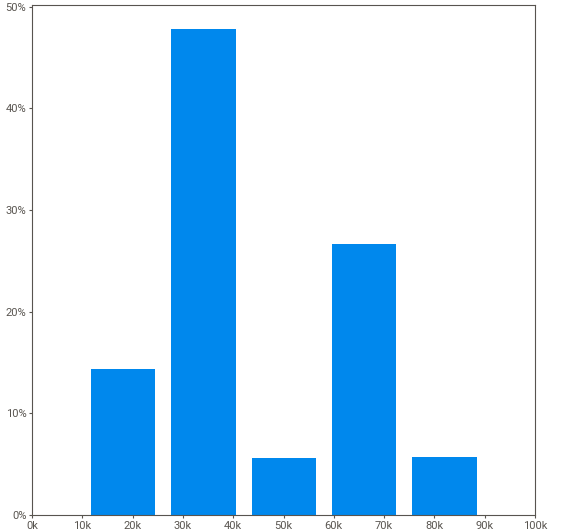
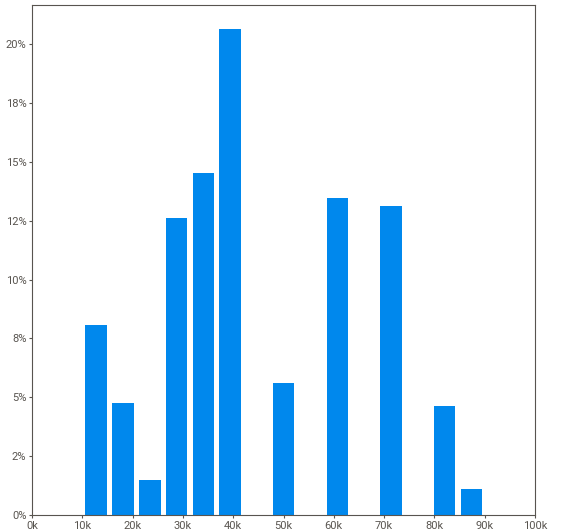
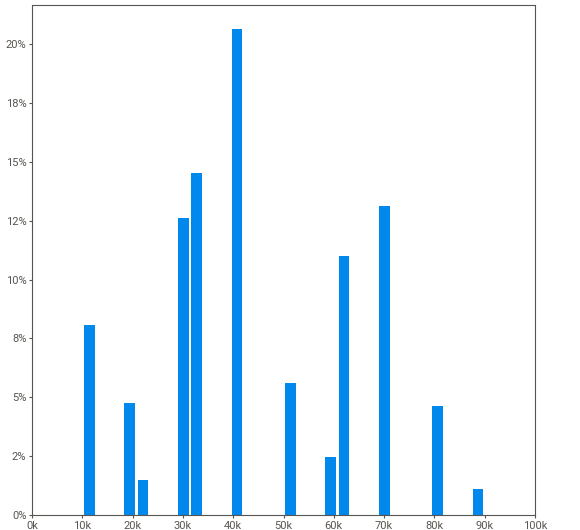
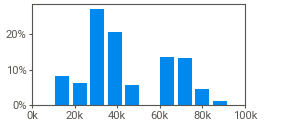
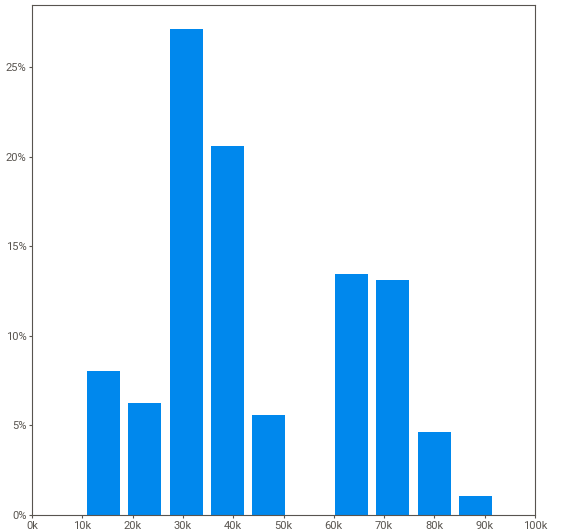
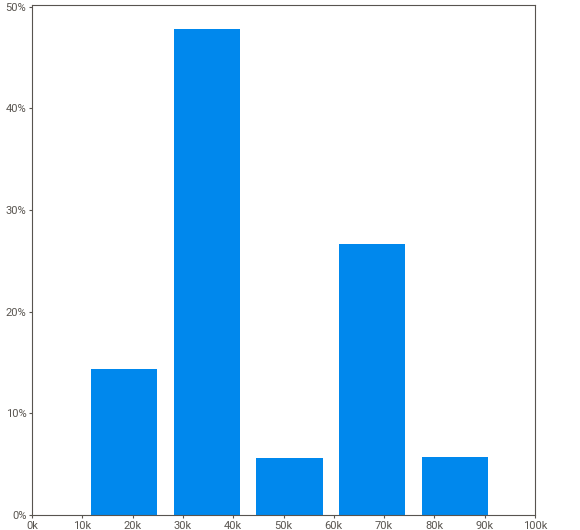
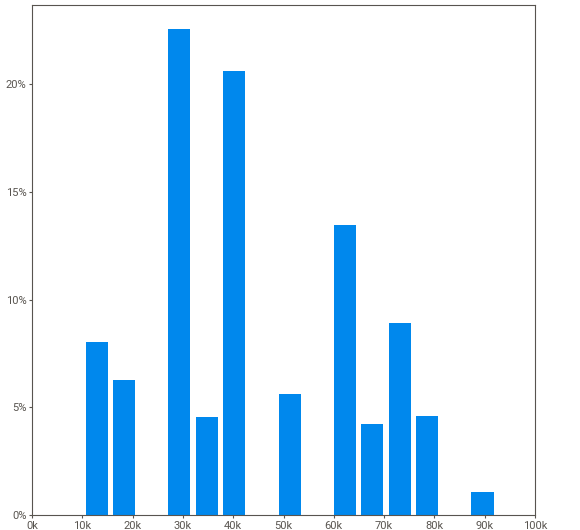
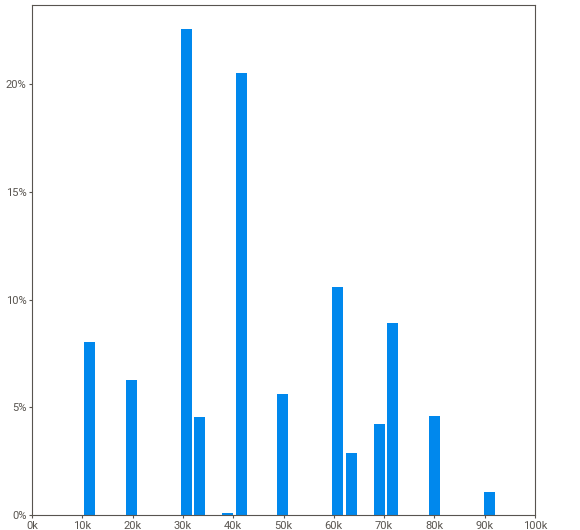
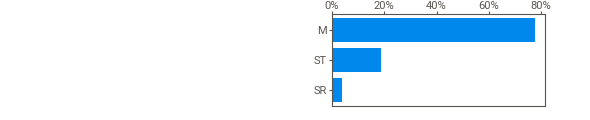
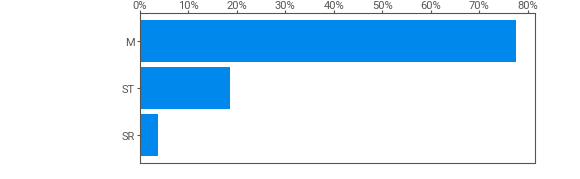
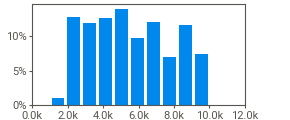
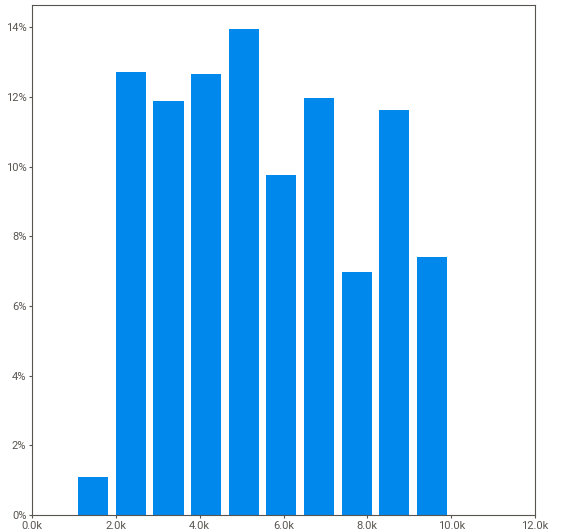
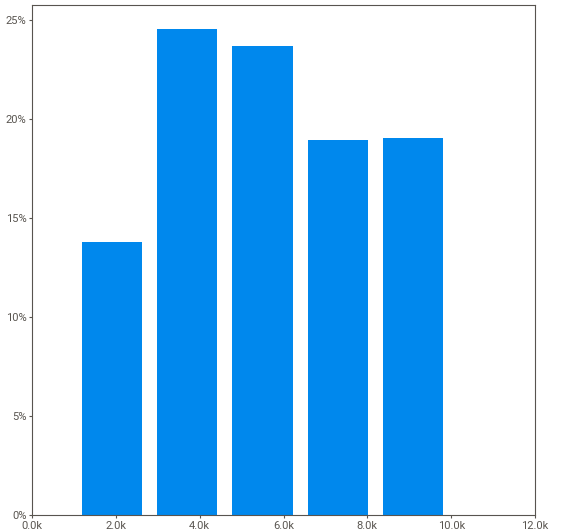
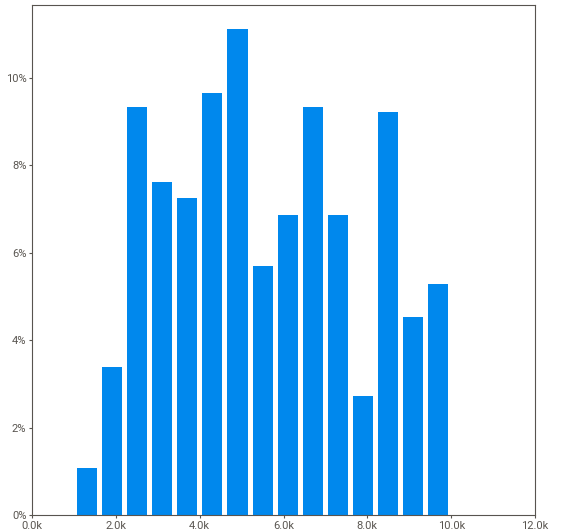
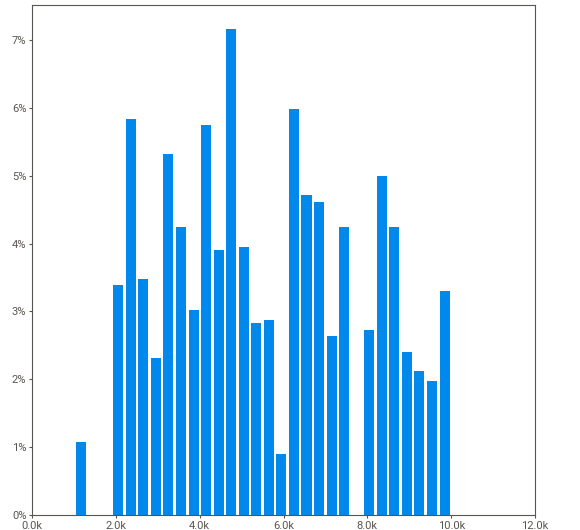
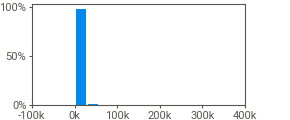
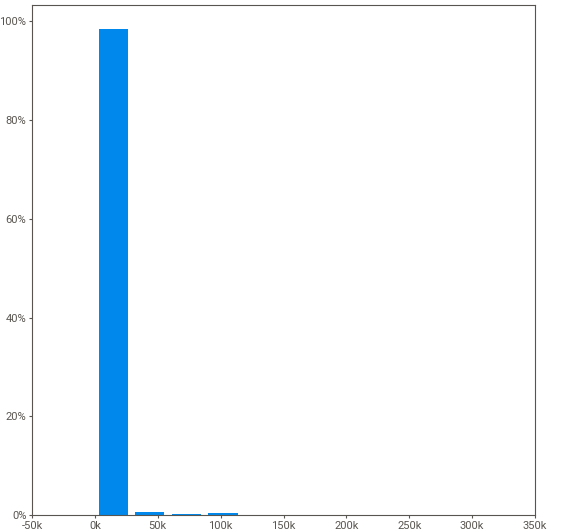
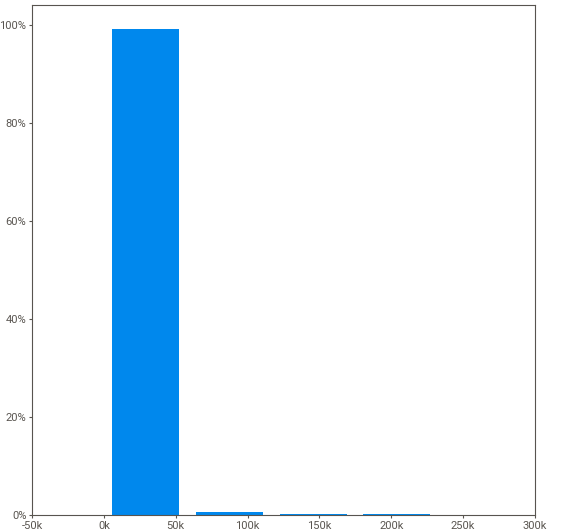
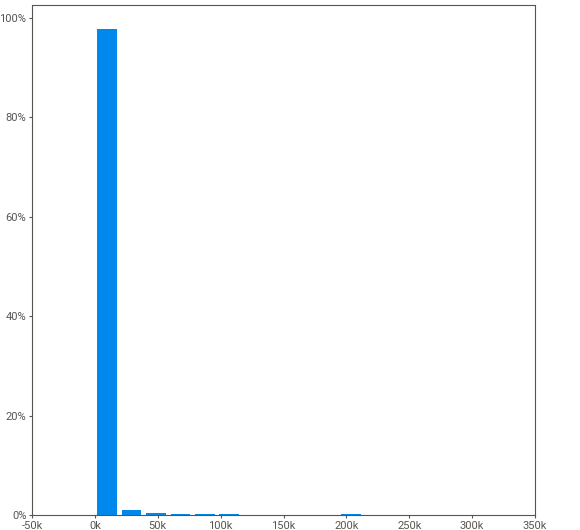
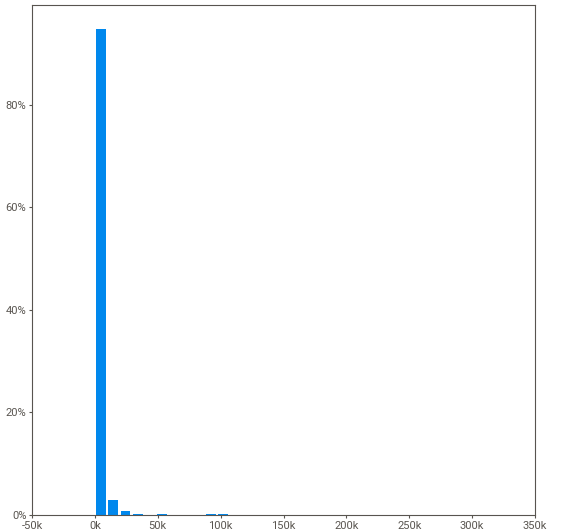
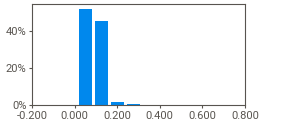
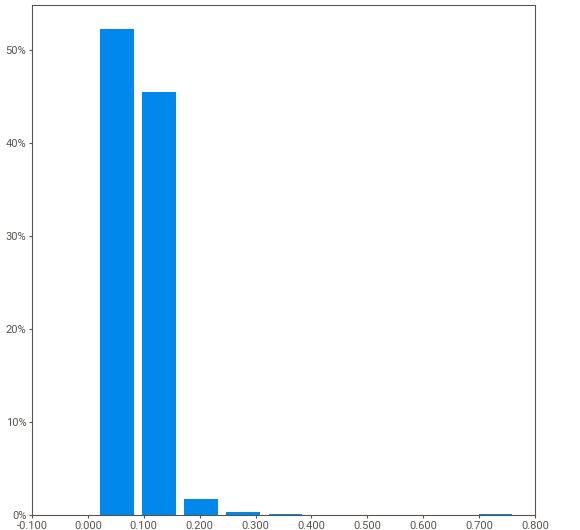
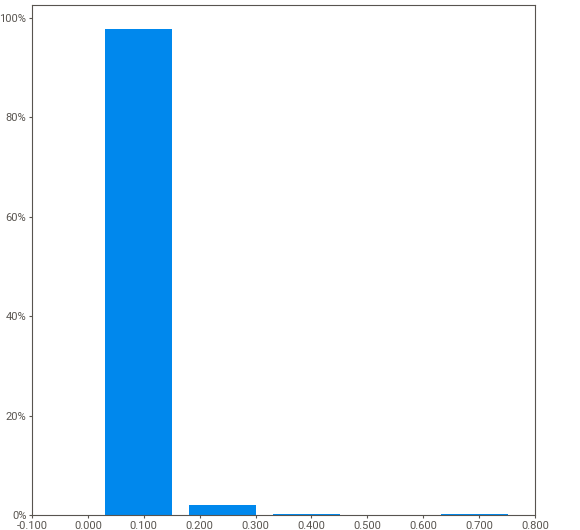
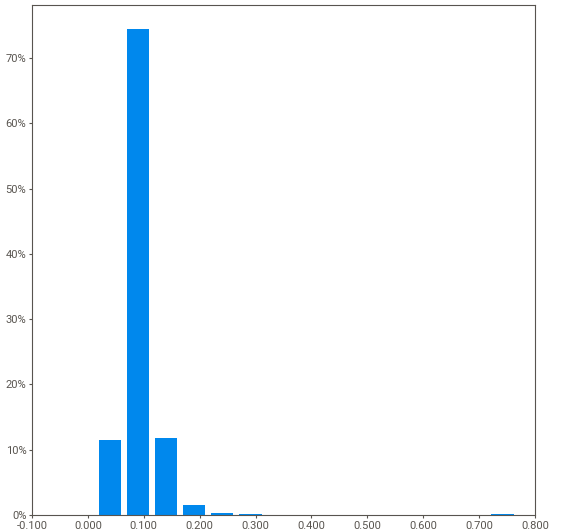
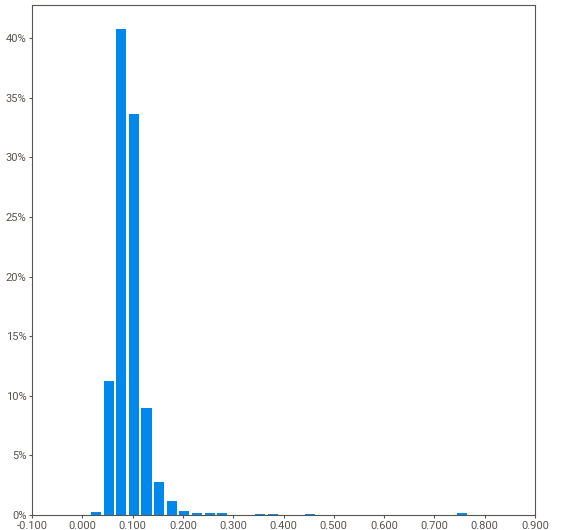
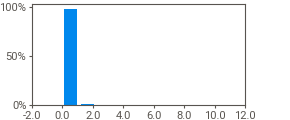
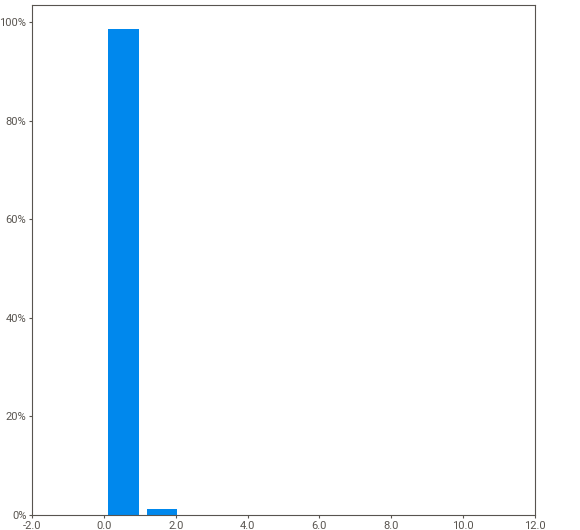
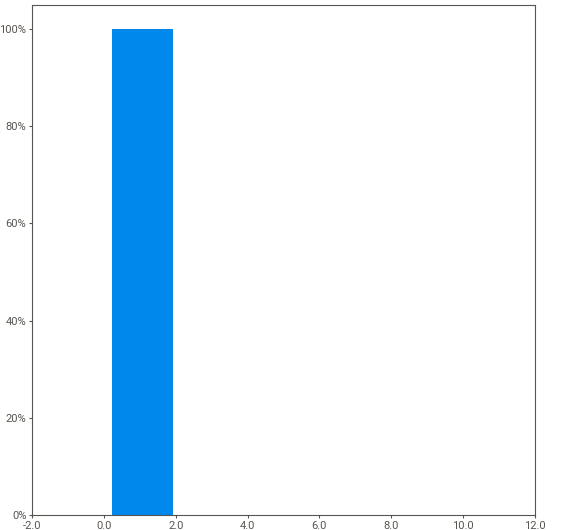
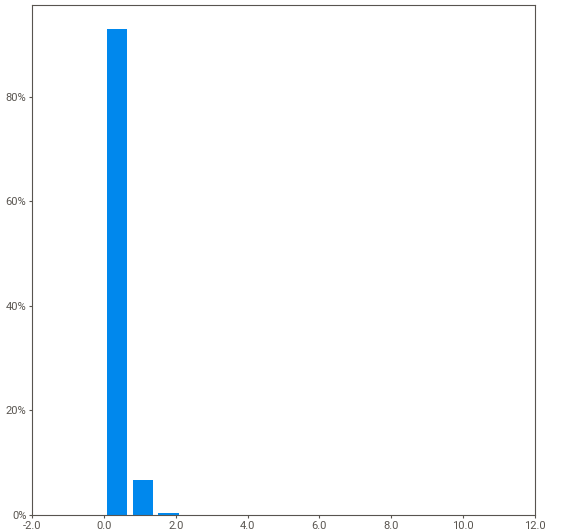
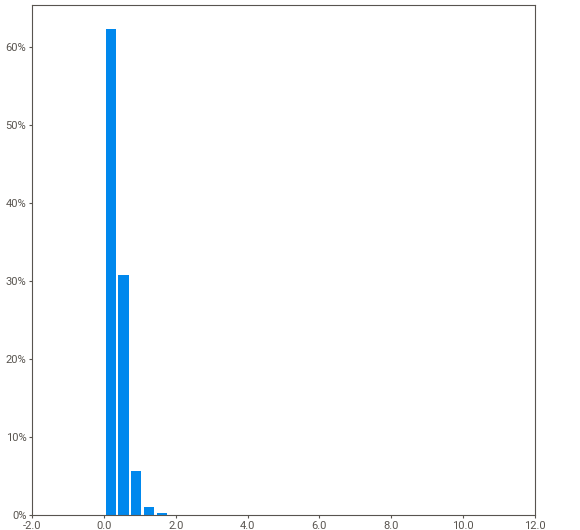
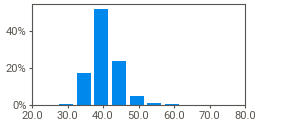
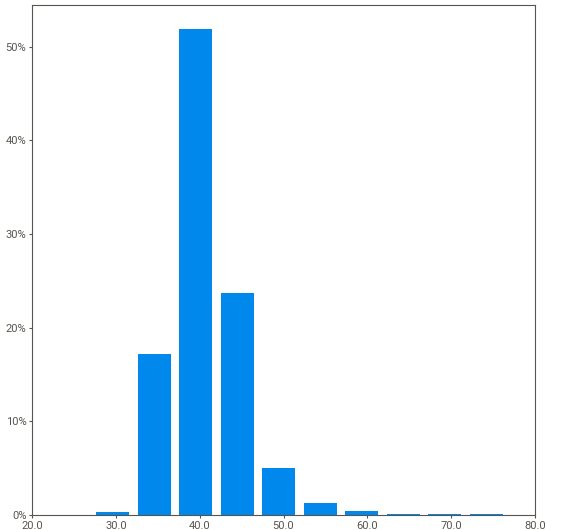
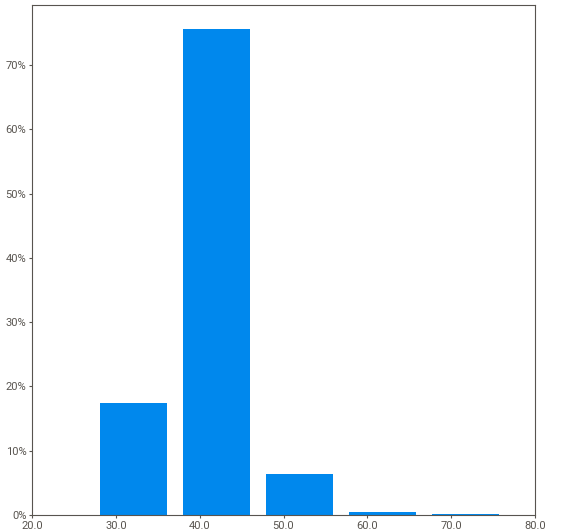
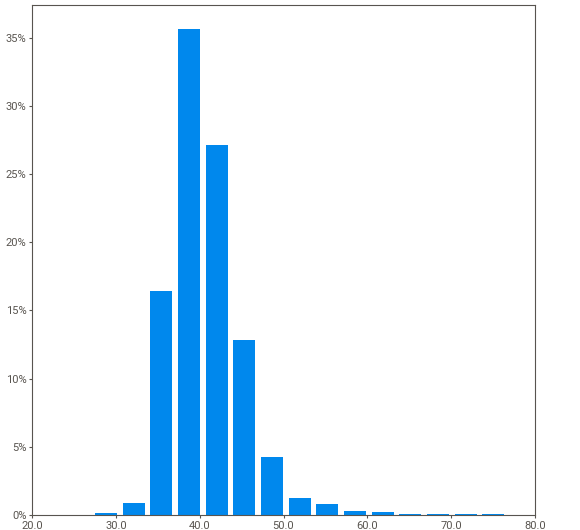
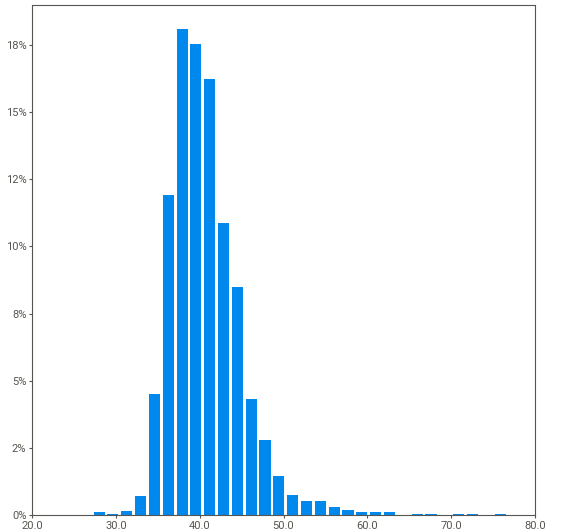
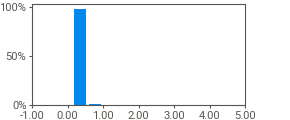
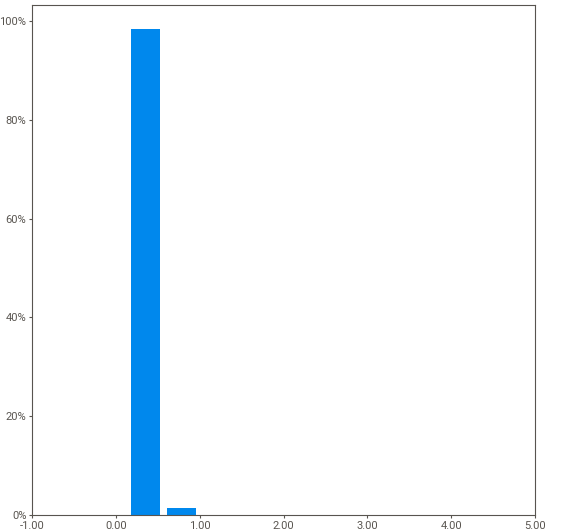
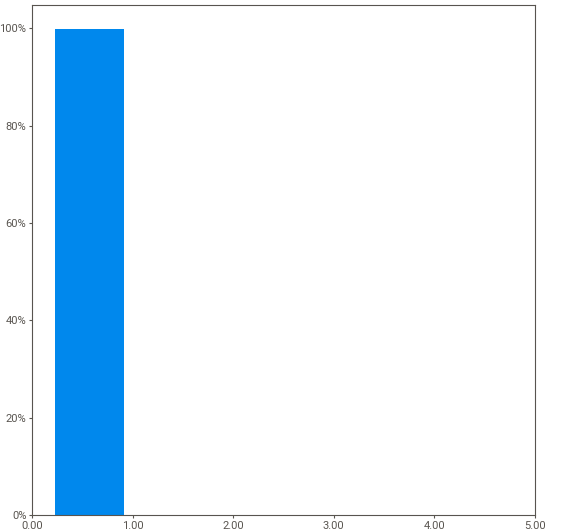
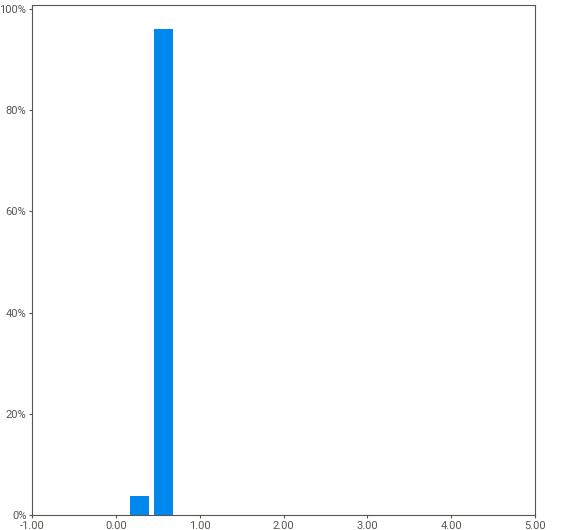
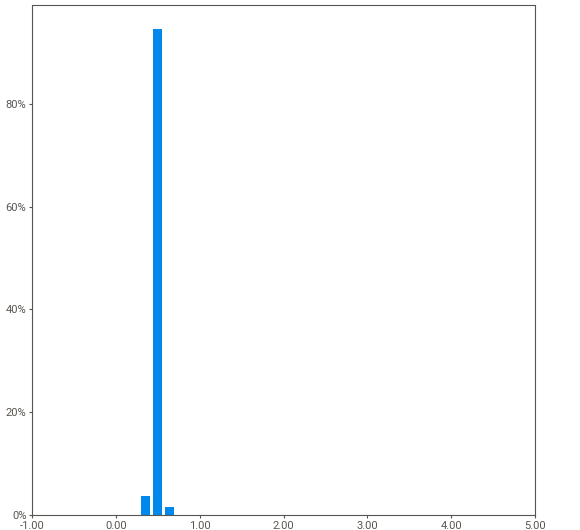
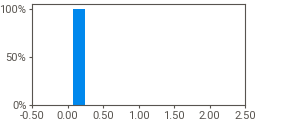
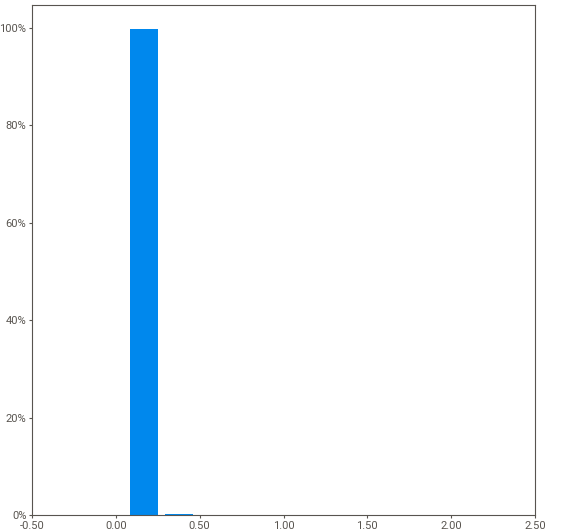
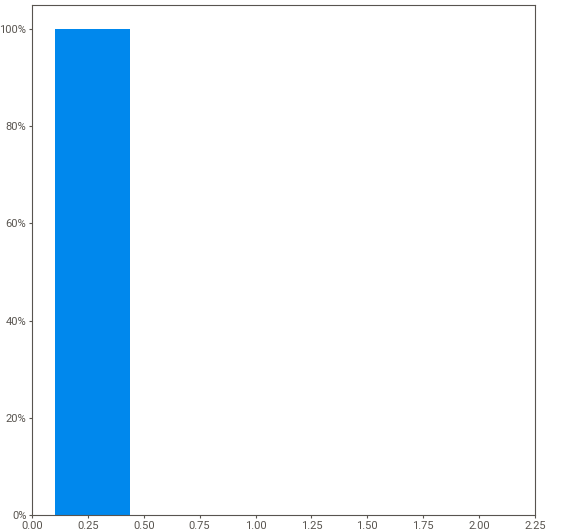
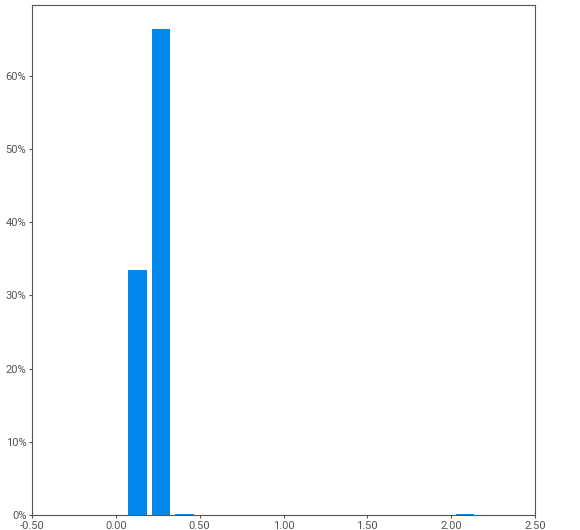
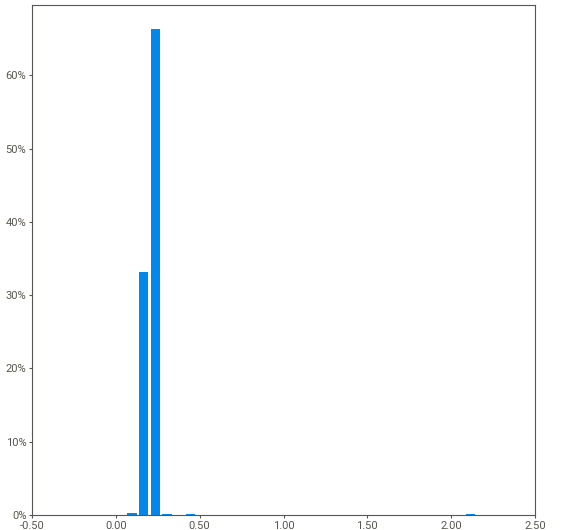
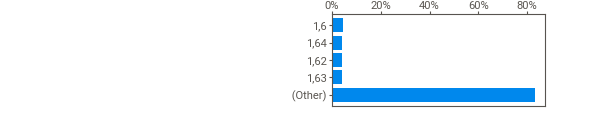
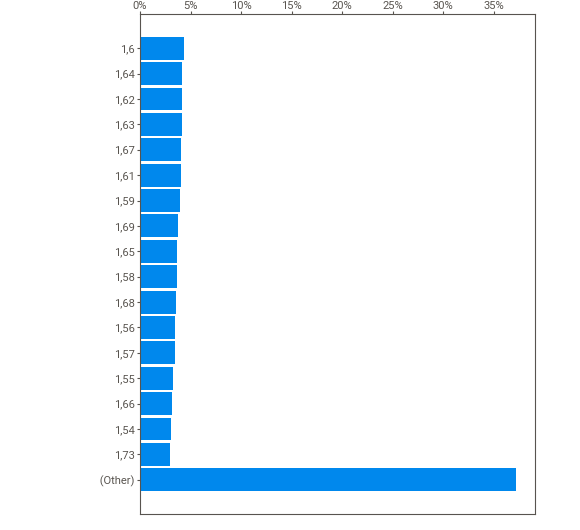
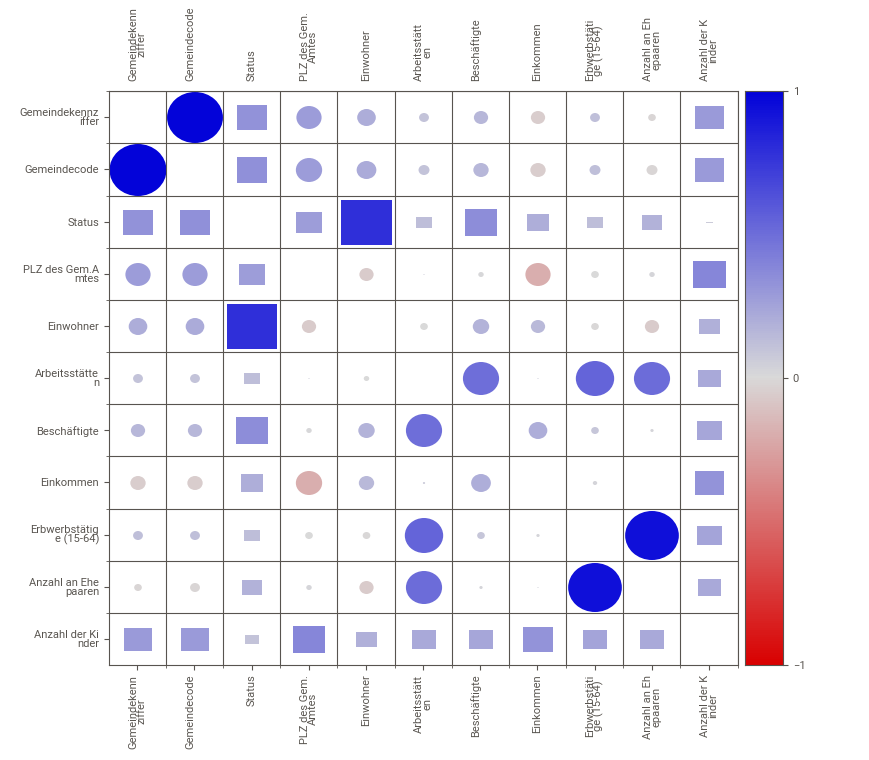
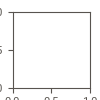

In [108]:
# Sweetviz ist vielleicht ein cooler Zusatz für die Datenanalyse. Manches wird einfacher und übersichtlicher gezeigt.
# Man kann auch zwei verschiedene Variablen miteinander vergleichen, oder ein "target" haben, ähnlich wie "groupby" von tableone.
import sweetviz as sv

my_report = sv.analyze(df_norm)
#my_report = sv.analyze(df_norm, target_feat='Beschäftigte')

# mit compare_intra kann man z.B kategorische werte miteinander vergleichen
# geht z.B mim medizin datensatz(ist hier derzeit nicht verfügbar..  aber man kann es lokal oder wo anders probieren):
#my_report = sv.compare_intra(hd_df, hd_df['sex'] == 'male', ['Male', 'Female'])

my_report.show_notebook()

#noch ein vorteil: wird viel schneller ausgeführt

In [ ]:
# Als Funktion umschreiben
def profile_hilfestellung(pandas_profile):
    import json
    from IPython.core.display import HTML

    # Profile in JSON umwandeln
    #json_data = pandas_profile.to_json()
    #pandas_profile.to_file("your_report.json")

    # JSON File importieren
    with open('your_report.json') as f:
        import_json_data = json.load(f)

    display(HTML("<h2> Hilfreiche Links: </h2>"))

    display(HTML("<p style='font-size:15px'> <a href='https://wissenschafts-thurm.de/grundlagen-der-statistik-wie-unterscheidet-man-zwischen-nominal-ordinal-und-kardinalskala/' target='_blank'>Grundlagen: Nominal-, Ordinal- und Kardinalskala</a> </p>"))

    # Man kann überprüfen ob kategorische, numerische, bool Werte vorhanden sind oder nicht
    if 'Categorical' in import_json_data['table']['types'].keys():
        display(HTML("<p style='font-size:15px'> <a href='https://en.wikipedia.org/wiki/List_of_analyses_of_categorical_data' target='_blank'>Analyse kategorischer Daten</a> </p>"))

    if 'Numeric' in import_json_data['table']['types'].keys():
        display(HTML("<p style='font-size:15px'> <a href='http://analytics.datengeschichten.at/doku.php?id=statistische_grundlagen' target='_blank'>Statistische Grundlagen</a> </p>"))

    # Schleife zum durchgehen von Werten und Infos pro Variable
    skewness_found = False
    missing_found = False


    for key, value in import_json_data['variables'].items():
        if value['n_missing'] != 0 and missing_found==False:
            display(HTML("<p style='font-size:15px'> <a href='https://www.inwt-statistics.de/blog-artikel-lesen/fehlende-werte-verstehen-und-handhaben.html' target='_blank'>Was macht man mit fehlenden Werten?</p></a>"))
            missing_found = True
        if 'skewness' in value and skewness_found==False:
            display(HTML("<p style='font-size:15px'> <a href='https://matheguru.com/stochastik/schiefe-linksschief-rechtsschief-symmetrisch.html' target='_blank'>Was bedeutet eine Skewness von " + str(value['skewness']) + " bei " + key + "?</p></a>"))
            skewness_found = True

    # Weitere allgemeine Links

    display(HTML("<p style='font-size:15px'> <a href='https://www.data-to-viz.com' target='_blank'>Visualisierungen nach/für Merkmal</a> </p>"))

    display(HTML("<p style='font-size:15px'> <a href='https://www.youtube.com/watch?v=gP-Xx26p_kc' target='_blank'>Video zur Binomial- und Normalverteilung</a> </p>"))

In [ ]:

# Funktion ausprobieren
profile_hilfestellung(profile)

In [ ]:
# kurze Übersicht: will vermutlich den normierten Datensatz benutzen
df_norm.head()

In [ ]:
#Idee: ML für Bundesländer: Gemeindekennzahl bzw Gemeindecode ignorieren, "Bundaesland" feld erstellen mit erster Ziffer (1-9).
#Oder ist es besser, Kategorien zu erstellen? Zahlen 1-9 könnten als numerische Interpretation falsch verwendet werden.

df_norm['Bundesland'] = df_norm['Gemeindekennziffer'].astype(str).str[0]
df_norm['Bundesland'] = df_norm['Bundesland'].astype(int)

df_norm.head(1000)

In [ ]:
df_norm.dtypes

In [ ]:
d_bundesland = {1:'Burgenland', 2:'Kärnten', 3:'Niederösterreich', 4:'Oberösterreich',
                5:'Salzburg', 6:'Steiermark', 7:'Tirol', 8:'Vorarlberg', 9:'Wien'}
df_norm['Bundesland'].replace(d_bundesland, inplace=True)

In [ ]:
df_norm.head()

In [ ]:
from pycaret.classification import *
exp = setup(data=df_norm, target='Bundesland', ignore_features=['Gemeindekennziffer', 'Gemeindename', 'Gemeindecode', 'PLZ des Gem.Amtes', 'weitere Postleitzahlen'], silent=True, session_id=101)

# weitere optionen: ignore_low_variance, group_features, bin_numeric_features, group_features, transformation, normalize
#    ensemble_model auch eine option? stack_models auch?

In [ ]:
#877.2s ... weniger folds? folds auf 3 probieren

#best = compare_models(fold=3, exclude=['catboost', 'xgboost', 'lightgbm'])

best = compare_models(fold=3, exclude=['lightgbm'])


In [ ]:
selected_model = create_model('rf', fold=3)

In [ ]:
tuned_model = tune_model(selected_model, fold=3)

In [ ]:
plot_model(tuned_model)

In [ ]:
interpret_model(tuned_model)

In [ ]:
evaluate_model(tuned_model)

In [ ]:
pred_holdout = predict_model(tuned_model)
pred_holdout.head()